<a href="https://colab.research.google.com/github/kurtlee1984/Deep_Leaning/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [12]:
names = [
    "airplane",									
    "automobile", 										
    "bird", 										
    "cat", 										
    "deer", 										
    "dog", 										
    "frog", 										
    "horse", 										
    "ship", 										
    "truck"
]

cat


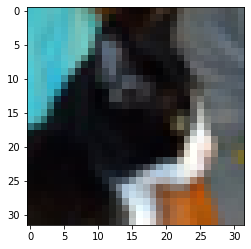

In [13]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    Conv2D(64, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(128, 3, activation="relu", padding="same"),
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary() 